# 6. Neural network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras as keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

plt.style.use("default")

/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jasonola/opt/an

In [2]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r label_encoder
%store -r classes
%store -r feature_names

In [3]:
X_train = np.concatenate((X_train,X_valid))
y_train = np.concatenate((y_train,y_valid))

Let's create our model with keras and make one dense layer to get the 10 outputs we want, I use softmax activation as it's the last layer. I want to use the grid search functionality from sklearn so I need to put the keras model into a wrapper, the KerasClassifier. In order to do that, I have to put my model into a function. I give the function parameters like the optimizer and a callbacks for early stopping.  

In [3]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)

In [4]:
def model1d(optimizer='rmsprop',callbacks=[early_stopping]):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=10,activation="softmax",input_dim=57))
    model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])
	
    return model

In [5]:
nn1d = KerasClassifier(build_fn=model1d, verbose=0)

Now we define our grid, we try 3 different epochs and 2 different batch sizes

In [6]:

epochs = [50, 100, 150]
batches = [25, 50]
param_grid = {
              "epochs":epochs,
              "batch_size":batches
             }
nn1d_gs = GridSearchCV(nn1d, param_grid)

In [7]:
nn1d_gs.fit(X_train,y_train);

After a long fit of the grid search I can now plot the confusion matrix, this time with force_model parameter to true. Same with the classification report

In [8]:
for param in nn1d_gs.best_params_:
    print(f"-{param} : {nn1d_gs.best_params_[param]}")

-batch_size : 25
-epochs : 150


/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


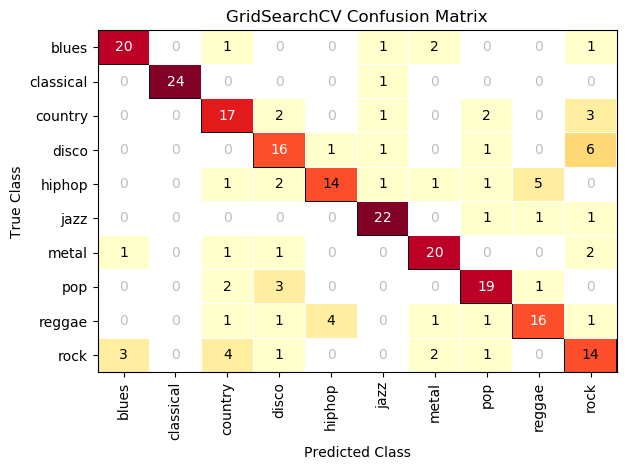

In [9]:
cm_nn1= ConfusionMatrix(nn1d_gs,classes=classes,label_encoder=label_encoder,force_model=True)
cm_nn1.fit(X_train,y_train)
cm_nn1.score(X_test,y_test)
cm_nn1.show();

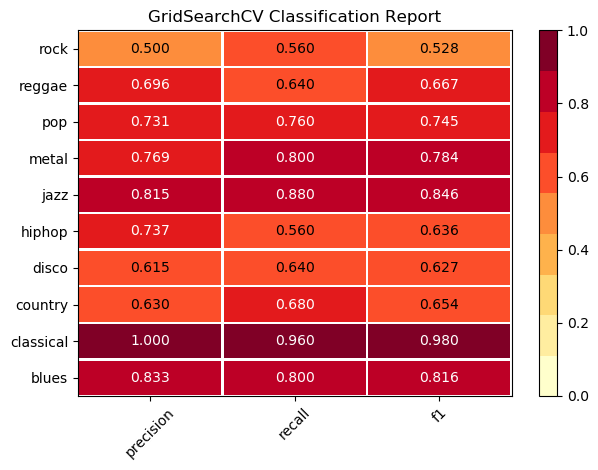

In [10]:
report = ClassificationReport(nn1d_gs,encoder=label_encoder,force_model=True)
report.fit(X_train,y_train)
report.score(X_test,y_test)
report.show();

In [11]:
nn1_score = nn1d_gs.best_score_

Seems like a 1 dimension neural network doesn't do much better than the other models, let's add a layer :

In [12]:
def model2d(optimizer='adam',callbacks=[early_stopping]):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=32,activation="relu",input_dim=57))
    model.add(keras.layers.Dense(units=10,activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
	
    return model

In [13]:
nn2d = KerasClassifier(build_fn=model2d, verbose=0)

In [14]:
nn2d_gs = GridSearchCV(nn2d, param_grid)

In [15]:
nn2d_gs.fit(X_train,y_train);

In [16]:
for param in nn2d_gs.best_params_:
    print(f"-{param} : {nn2d_gs.best_params_[param]}")

-batch_size : 25
-epochs : 150


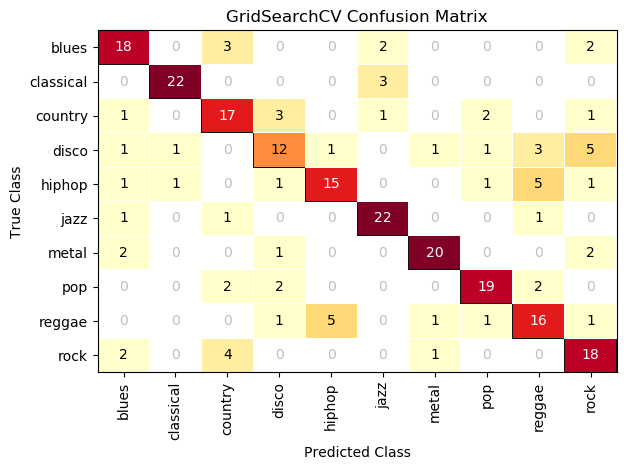

In [17]:
cm_nn2= ConfusionMatrix(nn2d_gs,classes=classes,label_encoder=label_encoder,force_model=True)
cm_nn2.fit(X_train,y_train)
cm_nn2.score(X_test,y_test)
cm_nn2.show();

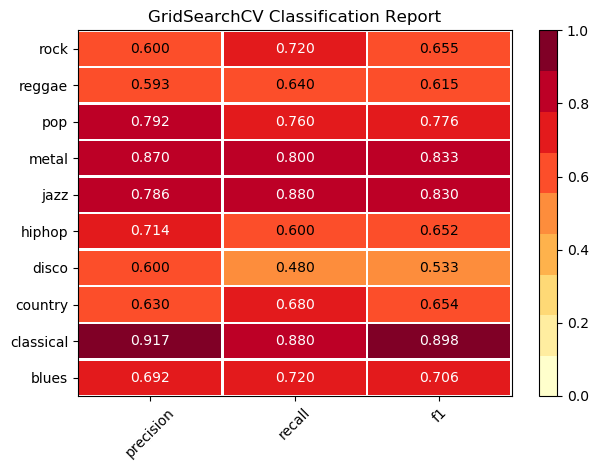

In [18]:
report2 = ClassificationReport(nn2d_gs,encoder=label_encoder,force_model=True)
report2.fit(X_train,y_train)
report2.score(X_test,y_test)
report2.show();

In [19]:
nn2_score = nn2d_gs.best_score_

In [20]:
print(f"- 1 layer neural network precision score : {round(nn1_score,3)}")
print(f"- 2 layer neural network precision score : {round(nn2_score,3)}")

- 1 layer neural network precision score : 0.695
- 2 layer neural network precision score : 0.696


We see that the second layer added doesn't improve the score much.  
The confusion matrix looks a little more even, rock does better with 2 layers, disco however does worse this time.

In [21]:
batch_size = nn2d_gs.best_params_["batch_size"]
epochs = nn2d_gs.best_params_["epochs"]

In [23]:
%store batch_size
%store epochs

Stored 'batch_size' (int)
Stored 'epochs' (int)
